# Intro

Name:  

    Cair_Lanley

Purpose:  

    Create a Langley plot for the Cair tubes attached to 2STAR
    Assumes that it is tracking at all times, does not filter for bad tracking

Input:

    none at command line

Output:

    dict and plots 

Keywords:

    none

Dependencies:

    - numpy
    - Pyephem
    - Sun_utils
    - Cair_utils

Needed Files:

  - Cair raw calibrated comma delimited files (URC)

Modification History:

    Written: Samuel LeBlanc, On flight from BWI to SJC, 2016-08-06
    Modified: 

# Load the required modules and prepare the paths

In [1]:
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import map_utils as mu
import Sun_utils as su
import Cair_utils as cu
import plotting_utils as pu

In [3]:
from mpltools import color

In [4]:
fp = 'C:\\Users\\sleblan2\\Research\\4STAR\\MLO_2016\\'

# Read some files

In [5]:
f = fp+'20160702_MLO5\\CAST_001_160702_090020_URC.csv'

In [176]:
c = cu.read_Cair(fp+'20160702_MLO5\\CAST_001_160702_090020_URC.csv')

read first
try for second read
trying datetime parse
trying parser
toutc


In [7]:
c.keys()

['Lt490_\xb5Wsr_cm\xb2_nm',
 'DateTime',
 'Lt710_\xb5Wsr_cm\xb2_nm',
 'Lt',
 'Lt875_\xb5Wsr_cm\xb2_nm',
 'Lt320_\xb5Wsr_cm\xb2_nm',
 'DateTimeUTC',
 'Millisecond_ms',
 'Lt555_\xb5Wsr_cm\xb2_nm',
 'Lt683_\xb5Wsr_cm\xb2_nm',
 'Lt1245_\xb5Wsr_cm\xb2_nm',
 'Lt780_\xb5Wsr_cm\xb2_nm',
 'GeneralExcelTime',
 'Lt510_\xb5Wsr_cm\xb2_nm',
 'Lt670_\xb5Wsr_cm\xb2_nm',
 'wvl',
 'Lt1640_\xb5Wsr_cm\xb2_nm',
 'Lt589_\xb5Wsr_cm\xb2_nm',
 'Lt380_\xb5Wsr_cm\xb2_nm',
 'Lt625_\xb5Wsr_cm\xb2_nm',
 'Lt532_\xb5Wsr_cm\xb2_nm',
 'Lt1020_\xb5Wsr_cm\xb2_nm',
 'Lt340_\xb5Wsr_cm\xb2_nm',
 'Lt412_\xb5Wsr_cm\xb2_nm',
 'Lt443_\xb5Wsr_cm\xb2_nm']

In [8]:
c['DateTimeUTC'][0]

datetime.datetime(2016, 7, 2, 16, 0, 20, 458000, tzinfo=tzutc())

# Generate the bandwith filter functions and a new wavelength range 

## Prepare the filter functions

In [9]:
def Gamma2sigma(Gamma):
    '''Function to convert FWHM (Gamma) to standard deviation (sigma)'''
    import numpy as np
    return Gamma * np.sqrt(2) / ( np.sqrt(2 * np.log(2)) * 2 )

In [10]:
def gaussian(x_center,fwhm):
    'Function that generates a gaussian distribution and a new x array to fit it onto'
    import numpy as np
    x = np.linspace(x_center-2*fwhm,x_center+2*fwhm,41)
    dg = np.exp( - ((x-x_center)/Gamma2sigma(fwhm))**2 )
    ndg = dg/np.sum(dg)#*np.diff([x,x[-1]+1]))
    return ndg, x

In [11]:
fwhm = [10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,15,30]

In [177]:
band_f = []
band_wvl = []
for i,l in enumerate(c['wvl']):
    f,wl = gaussian(l,fwhm[i])
    band_f.append(f)
    band_wvl.append(wl)

In [178]:
c['band_f'] = band_f
c['band_wvl'] = band_wvl

## Plot the filter functions

<IPython.core.display.Javascript object>


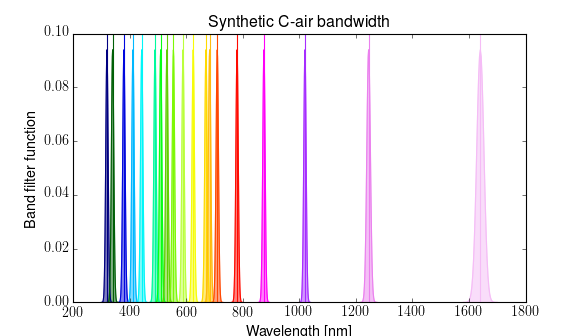

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=ax)
for i,l in enumerate(c['wvl']):
    p = ax.plot(band_wvl[i],band_f[i])
    ax.axvline(l,color=p[0].get_color())
    ax.fill_between(band_wvl[i],band_f[i],0,color=p[0].get_color(),alpha=0.5)
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Band filter function')
ax.set_title('Synthetic C-air bandwidth')
plt.savefig(fp+'C-air_synthetic_bandwidth.png',dpi=600,transparent=True)

# Run analysis and calculate the airmass and rayleigh

In [179]:
lat, lon, alt = 19.5365,-155.57615,3428.0

## Calculate the airmass and sza

In [180]:
c = su.calc_sza_airmass(c['DateTimeUTC'],lat,lon,alt,c=c)

In [17]:
c.keys()

['Lt490_\xb5Wsr_cm\xb2_nm',
 'sza',
 'DateTime',
 'Lt710_\xb5Wsr_cm\xb2_nm',
 'm_aero',
 'Lt',
 'alt',
 'Lt875_\xb5Wsr_cm\xb2_nm',
 'azi',
 'Lt320_\xb5Wsr_cm\xb2_nm',
 'lon',
 'DateTimeUTC',
 'Millisecond_ms',
 'band_wvl',
 'Lt555_\xb5Wsr_cm\xb2_nm',
 'band_f',
 'm_o3',
 'Lt683_\xb5Wsr_cm\xb2_nm',
 'Lt1245_\xb5Wsr_cm\xb2_nm',
 'Lt780_\xb5Wsr_cm\xb2_nm',
 'GeneralExcelTime',
 'Lt510_\xb5Wsr_cm\xb2_nm',
 'Lt670_\xb5Wsr_cm\xb2_nm',
 'wvl',
 'lat',
 'Lt1640_\xb5Wsr_cm\xb2_nm',
 'Lt589_\xb5Wsr_cm\xb2_nm',
 'm_ray',
 'Lt380_\xb5Wsr_cm\xb2_nm',
 'Lt625_\xb5Wsr_cm\xb2_nm',
 'Lt532_\xb5Wsr_cm\xb2_nm',
 'declination',
 'sunearthf',
 'Lt1020_\xb5Wsr_cm\xb2_nm',
 'Lt340_\xb5Wsr_cm\xb2_nm',
 'Lt412_\xb5Wsr_cm\xb2_nm',
 'Lt443_\xb5Wsr_cm\xb2_nm']

In [18]:
c['Lt'].shape

(19L, 151250L)

## get the rayleigh tau at center bands

In [181]:
c['tau_rayleigh'],c['tau_rayleigh_err'] = cu.calc_rayleigh(c,press=680.0)

In [20]:
c['wvl']

[320.0,
 340.0,
 380.0,
 412.0,
 443.0,
 490.0,
 510.0,
 532.0,
 555.0,
 589.0,
 625.0,
 670.0,
 683.0,
 710.0,
 780.0,
 875.0,
 1020.0,
 1245.0,
 1640.0]

In [50]:
c.keys()

['Lt490_\xb5Wsr_cm\xb2_nm',
 'tau_rayleigh_err',
 'sza',
 'tau_rayleigh',
 'DateTime',
 'Lt710_\xb5Wsr_cm\xb2_nm',
 'm_aero',
 'Lt',
 'alt',
 'Lt875_\xb5Wsr_cm\xb2_nm',
 'azi',
 'Lt320_\xb5Wsr_cm\xb2_nm',
 'lon',
 'DateTimeUTC',
 'Millisecond_ms',
 'Lt555_\xb5Wsr_cm\xb2_nm',
 'm_o3',
 'Lt683_\xb5Wsr_cm\xb2_nm',
 'Lt1245_\xb5Wsr_cm\xb2_nm',
 'Lt780_\xb5Wsr_cm\xb2_nm',
 'GeneralExcelTime',
 'pressure',
 'Lt510_\xb5Wsr_cm\xb2_nm',
 'Lt670_\xb5Wsr_cm\xb2_nm',
 'wvl',
 'lat',
 'Lt1640_\xb5Wsr_cm\xb2_nm',
 'Lt589_\xb5Wsr_cm\xb2_nm',
 'm_ray',
 'Lt380_\xb5Wsr_cm\xb2_nm',
 'Lt625_\xb5Wsr_cm\xb2_nm',
 'Lt532_\xb5Wsr_cm\xb2_nm',
 'declination',
 'sunearthf',
 'Lt1020_\xb5Wsr_cm\xb2_nm',
 'Lt340_\xb5Wsr_cm\xb2_nm',
 'Lt412_\xb5Wsr_cm\xb2_nm',
 'Lt443_\xb5Wsr_cm\xb2_nm']

### Verify the calculated tau_rayleigh

In [21]:
import matplotlib.dates as mdates
fmt = mdates.DateFormatter('%H:%M')

<IPython.core.display.Javascript object>


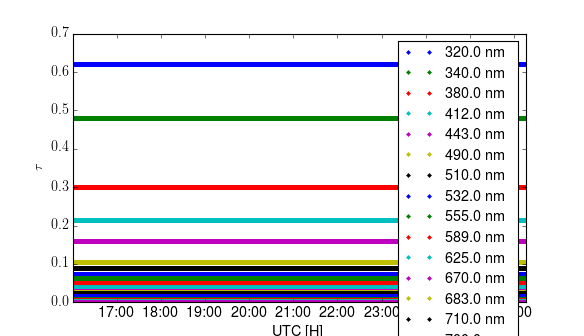

In [22]:
fig = plt.figure()
for i,l in enumerate(c['wvl']):
    plt.plot(c['DateTimeUTC'],c['tau_rayleigh'][i,:],'.',label='{} nm'.format(l))
fig.axes[0].xaxis.set_major_formatter(fmt)
plt.legend(frameon=True)
plt.xlabel('UTC [H]')
plt.ylabel('$\\tau$')

In [23]:
c['DateTimeUTC'][-1]

datetime.datetime(2016, 7, 3, 2, 15, 54, 781000, tzinfo=tzutc())

<IPython.core.display.Javascript object>


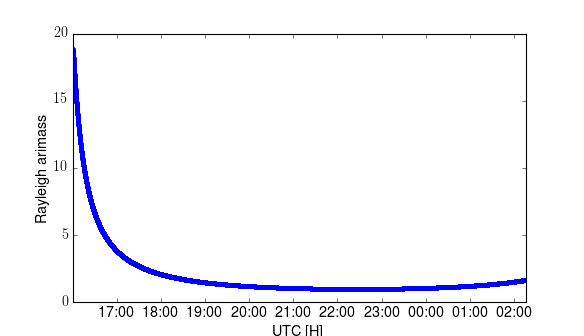

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [24]:
fig = plt.figure()
plt.plot(c['DateTimeUTC'],c['m_ray'],'.')
fig.axes[0].xaxis.set_major_formatter(fmt)
plt.legend(frameon=True)
plt.xlabel('UTC [H]')
plt.ylabel('Rayleigh arimass')

<IPython.core.display.Javascript object>


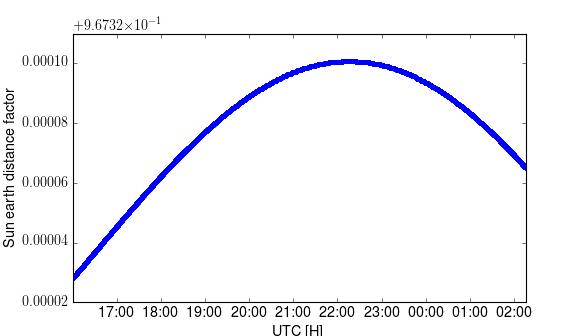

In [25]:
fig = plt.figure()
plt.plot(c['DateTimeUTC'],c['sunearthf'],'.')
fig.axes[0].xaxis.set_major_formatter(fmt)
plt.legend(frameon=True)
plt.xlabel('UTC [H]')
plt.ylabel('Sun earth distance factor')

<IPython.core.display.Javascript object>


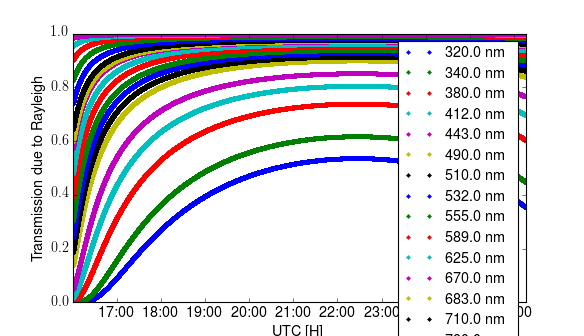

In [26]:
fig = plt.figure()
for i,l in enumerate(c['wvl']):
    plt.plot(c['DateTimeUTC'],np.exp(-np.array(c['m_ray'])*c['tau_rayleigh'])[i,:],'.',label='{} nm'.format(l))
fig.axes[0].xaxis.set_major_formatter(fmt)
plt.legend(frameon=True)
plt.xlabel('UTC [H]')
plt.ylabel('Transmission due to Rayleigh')

## Get the Rayleigh tau at wavelengths of filter bands

In [182]:
c['tau_rayleigh_fl'],c['tau_rayleigh_fl_err'] = cu.calc_rayleigh_filter(c,band_wvl,press=680.0)

## Calculate the 'rateaero' or Lt_aero
Which is the Lt values divided by the impact of rayleigh, and trace gases

In [183]:
c['Lt_aero'] = c['Lt']/np.array(c['sunearthf'])/np.exp(-np.array(c['m_ray'])*c['tau_rayleigh'])

In [29]:
c['Lt_aero'].shape

(19L, 151250L)

### Calculate the filter modified Lt_aero

In [189]:
c['Lt_aero_fl'] = np.zeros_like(c['Lt_aero'])
c['tr_rayleigh'] = np.zeros_like(c['Lt_aero'])

In [190]:
for i,l in enumerate(c['wvl']):
    tr = 1.0/np.exp(-np.array(c['m_ray'])[:,np.newaxis]*c['tau_rayleigh_fl'][i,:,:])
    c['tr_rayleigh'][i,:] = np.dot(tr,band_f[i])
    c['Lt_aero_fl'][i,:] = c['Lt'][i,:]/np.array(c['sunearthf'])*c['tr_rayleigh'][i,:]

### plot the filter modified Lt_aero

In [32]:
import matplotlib.dates as mdates
fmt = mdates.DateFormatter('%H:%M')

<IPython.core.display.Javascript object>


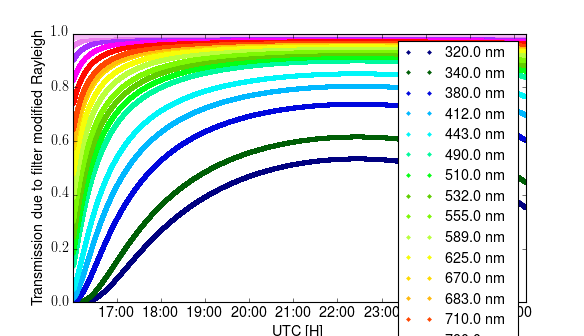

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
for i,l in enumerate(c['wvl']):
    plt.plot(c['DateTimeUTC'],1.0/c['tr_rayleigh'][i,:],'.',label='{} nm'.format(l))
fig.axes[0].xaxis.set_major_formatter(fmt)
plt.legend(frameon=True)
plt.xlabel('UTC [H]')
plt.ylabel('Transmission due to filter modified Rayleigh')

# Plot the resulting langleys

## find the portions of the day for the langley

In [34]:
from datetime import datetime
import dateutil
from dateutil.tz import tzutc

In [186]:
fl = np.where((c['DateTimeUTC']>datetime(2016,7,2,16,tzinfo=dateutil.tz.tzutc())) & (c['DateTimeUTC']<datetime(2016,7,2,21,tzinfo=dateutil.tz.tzutc())))[0]

In [187]:
fl_mu = (np.array(c['m_aero'])[fl]<12.0)&(np.array(c['m_aero'])[fl]>1.5)

<IPython.core.display.Javascript object>


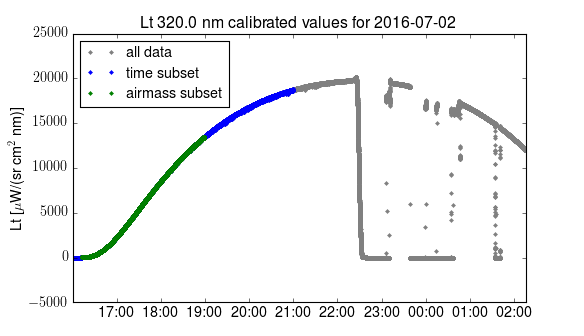

<IPython.core.display.Javascript object>


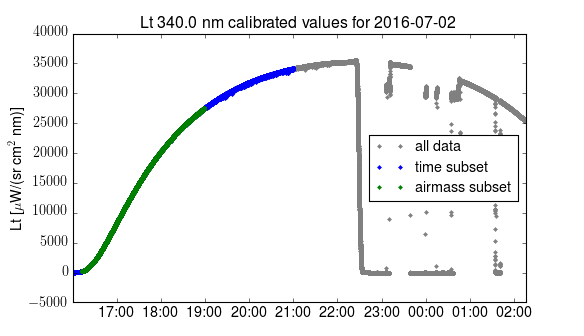

<IPython.core.display.Javascript object>


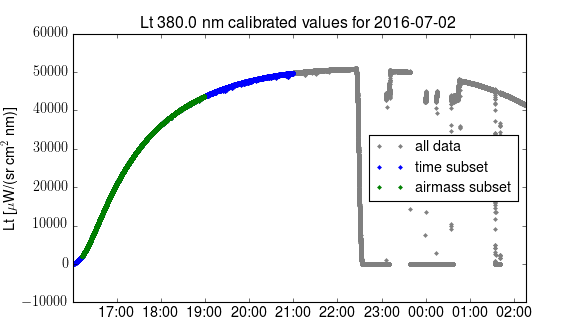

<IPython.core.display.Javascript object>


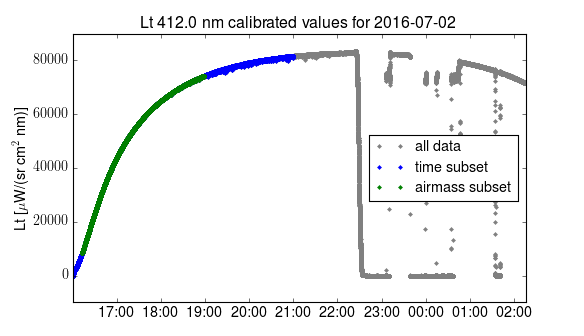

<IPython.core.display.Javascript object>


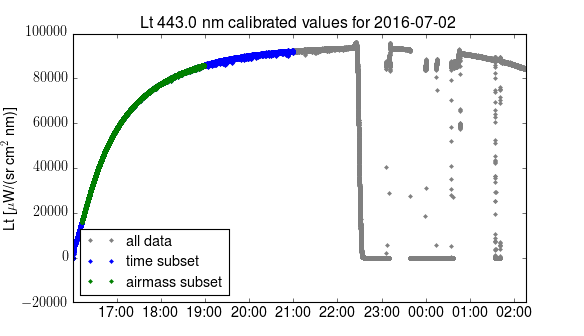

<IPython.core.display.Javascript object>


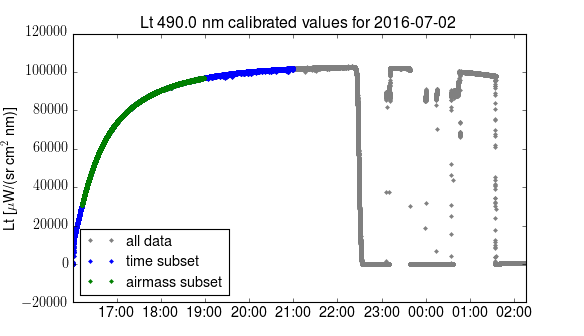

<IPython.core.display.Javascript object>


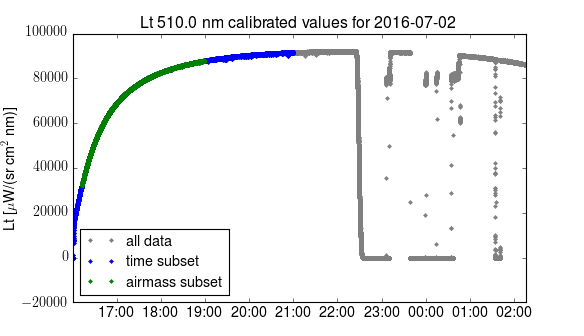

<IPython.core.display.Javascript object>


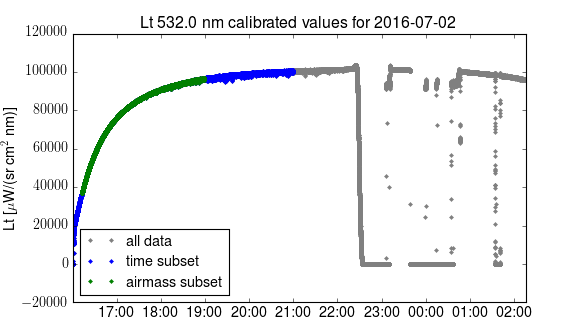

<IPython.core.display.Javascript object>


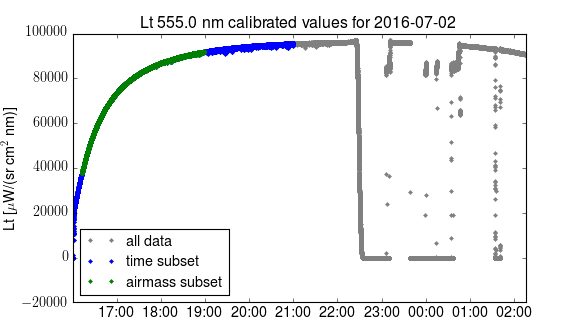

<IPython.core.display.Javascript object>


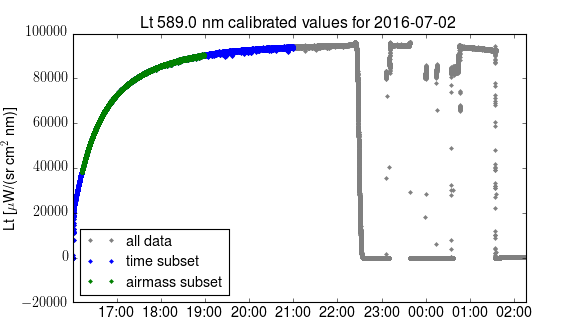

<IPython.core.display.Javascript object>


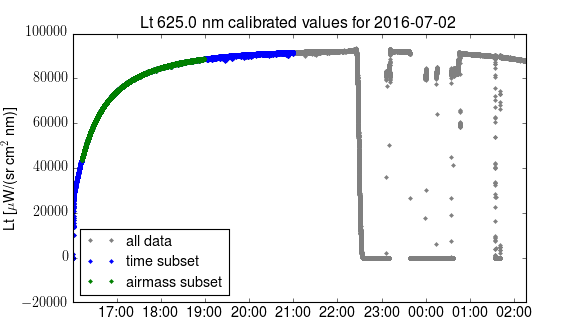

<IPython.core.display.Javascript object>


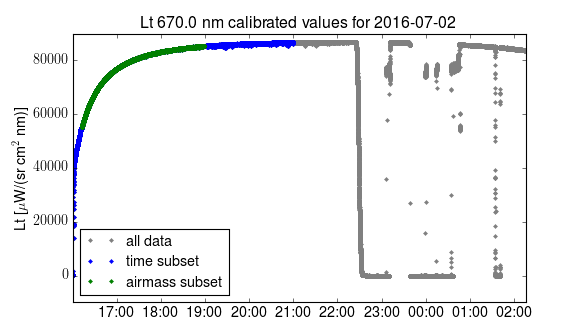

<IPython.core.display.Javascript object>


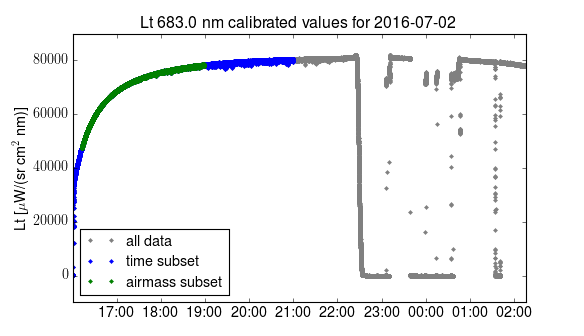

<IPython.core.display.Javascript object>


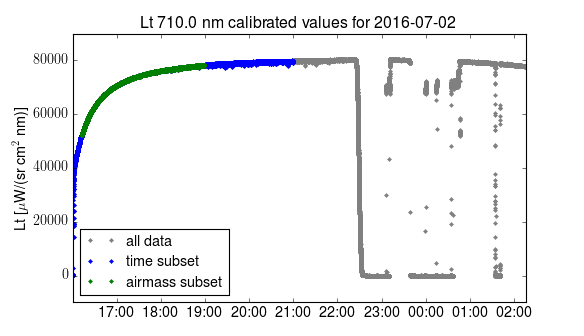

<IPython.core.display.Javascript object>


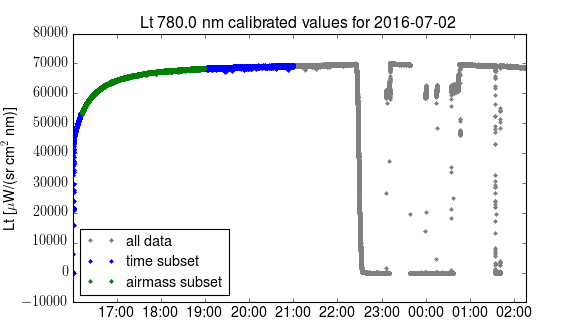

<IPython.core.display.Javascript object>


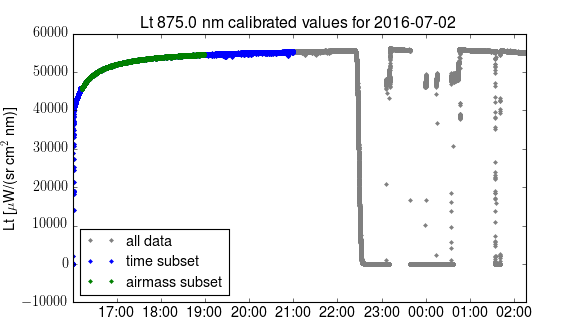

<IPython.core.display.Javascript object>


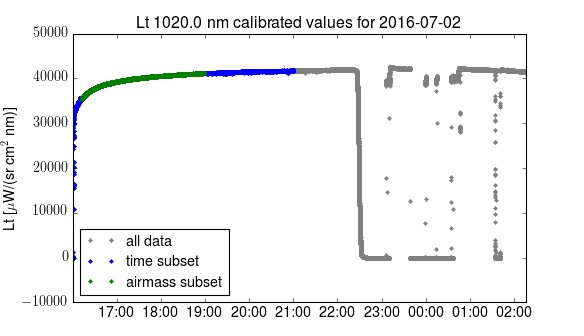

<IPython.core.display.Javascript object>


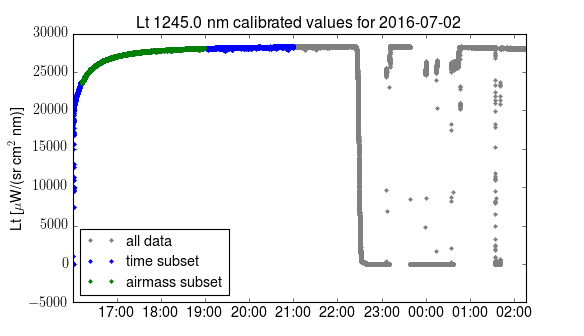

<IPython.core.display.Javascript object>


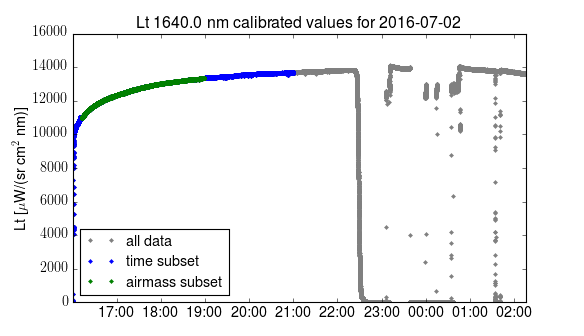

In [141]:
for i,l in enumerate(c['wvl']):
    fig = plt.figure()
    plt.plot(c['DateTimeUTC'],c['Lt'][i,:],'.',color='grey',label='all data')
    plt.plot(c['DateTimeUTC'][fl],c['Lt'][i,fl],'.',color='blue',label='time subset')
    plt.plot(c['DateTimeUTC'][fl[fl_mu]],c['Lt'][i,fl[fl_mu]],'.',color='green',label='airmass subset')
    plt.ylabel('Lt [$\\mu$W/(sr cm$^{2}$ nm)]')
    fig.axes[0].xaxis.set_major_formatter(fmt)
    plt.title('Lt {} nm calibrated values for {:%Y-%m-%d}'.format(c['wvl'][i],c['DateTimeUTC'][0]))
    plt.legend(loc=0)
    plt.savefig(fp+'{:%Y%m%d}_timeseries_Lt_{:04.0f}.png'.format(c['DateTimeUTC'][0],c['wvl'][i]),transparent=True,dpi=600)

<IPython.core.display.Javascript object>


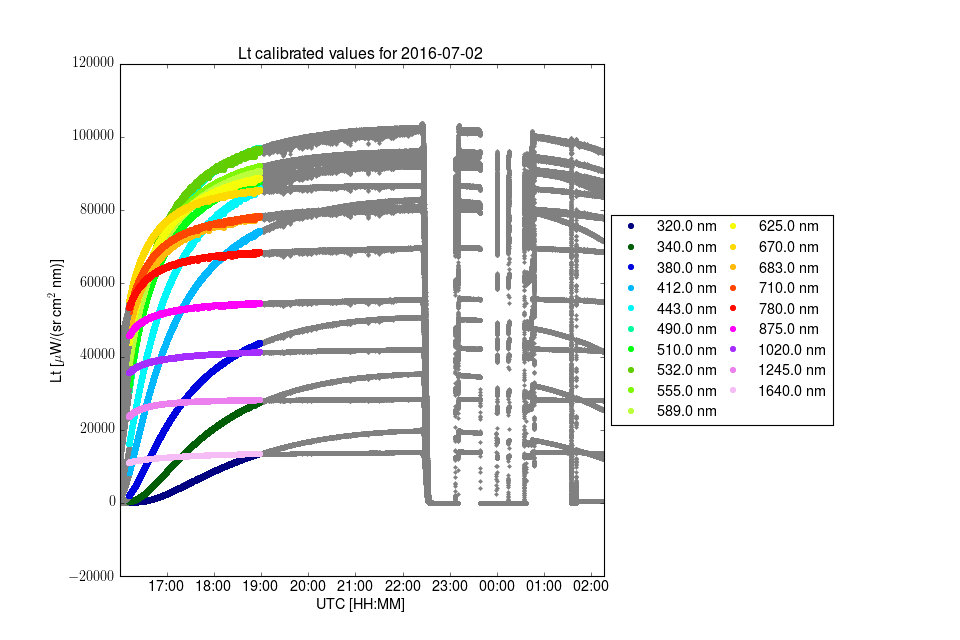

In [195]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
for i,l in enumerate(c['wvl']):
    plt.plot(c['DateTimeUTC'],c['Lt'][i,:],'.',color='grey')
    #plt.plot(c['DateTimeUTC'][fl],c['Lt'][i,fl],'.',label='{} nm'.format(l))
    plt.plot(c['DateTimeUTC'][fl[fl_mu]],c['Lt'][i,fl[fl_mu]],'o',label='{} nm'.format(l),markeredgecolor='None')
plt.ylabel('Lt [$\\mu$W/(sr cm$^{2}$ nm)]')
plt.xlabel('UTC [HH:MM]')
fig.axes[0].xaxis.set_major_formatter(fmt)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.65, box.height])
plt.title('Lt calibrated values for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5),frameon=True,ncol=2,numpoints=1,columnspacing=0.1)
plt.savefig(fp+'{:%Y%m%d}_timeseries_Lt.png'.format(c['DateTimeUTC'][0]),transparent=True,dpi=600)

## Plot the langley for each wavelength

### Plot the langleys seperated by channel

<IPython.core.display.Javascript object>


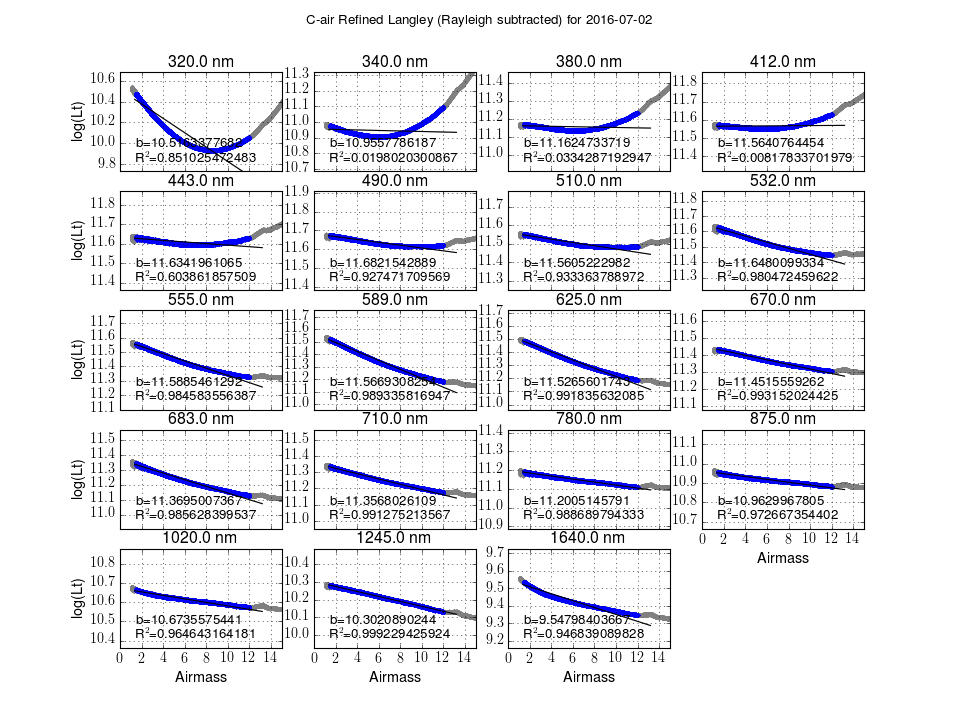

In [158]:
fig,ax = plt.subplots(5,4,sharex=True,figsize=(12,9))
ax = ax.ravel()
for i,l in enumerate(c['wvl']):
    ax[i].plot(np.array(c['m_aero'])[fl],np.log(c['Lt_aero'][i,fl]),'.',color='grey',label='bad data')
    ax[i].plot(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero'][i,fl[fl_mu]]),'.',color='b',label='good data')
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero'][i,fl[fl_mu]]),
                         color='k',ci=0.99,ax=ax[i],labels=False)
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero'][i,fl[fl_mu]]))
    ax[i].text(0.1,0.1,'b={}\nR$^2$={}'.format(p[0],r[0,1]**2),transform=ax[i].transAxes)
    
    ax[i].set_title('{} nm'.format(l))
    ax[i].grid()
    if i > 14: 
        ax[i].set_xlabel('Airmass')
    if i in [0,4,8,12,16]:
        ax[i].set_ylabel('log(Lt)')
    #ax[i].legend(frameon=True)
    ax[i].set_xlim(0,15)
    ax[i].set_ylim(min(np.log(c['Lt_aero'][i,fl[fl_mu]]))*0.98,max(np.log(c['Lt_aero'][i,fl[fl_mu]]))*1.02)
    
for tk in ax[15].get_xticklabels():
    tk.set_visible(True)
ax[i+1].axis('off')
plt.suptitle('C-air Refined Langley (Rayleigh subtracted) for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.savefig(fp+'{:%Y%m%d}_Langley_refined.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


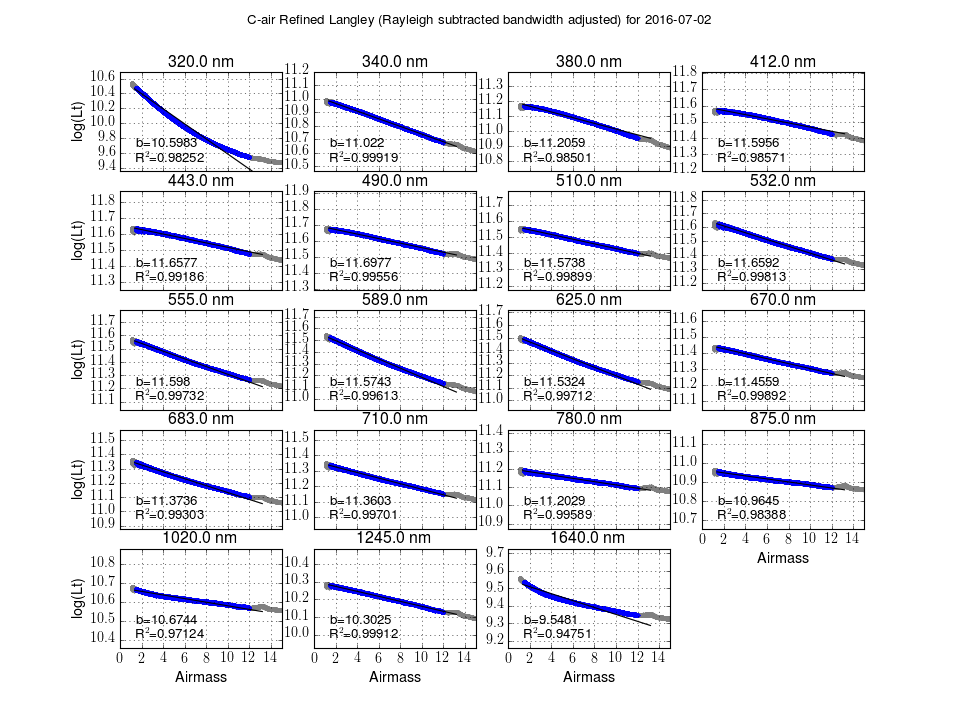

In [194]:
fig,ax = plt.subplots(5,4,sharex=True,figsize=(12,9))
ax = ax.ravel()
c['Lt_0'] = np.zeros_like(c['wvl'])
c['langley_aod'] = np.zeros_like(c['wvl'])
c['langley_aod_err'] = np.zeros_like(c['wvl'])
c['Lt_0_err'] = np.zeros_like(c['wvl'])
c['Lt_0_r2'] = np.zeros_like(c['wvl'])
for i,l in enumerate(c['wvl']):
    ax[i].plot(np.array(c['m_aero'])[fl],np.log(c['Lt_aero_fl'][i,fl]),'.',color='grey',label='bad data')
    ax[i].plot(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]]),'.',color='b',label='good data')
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]]),
                         color='k',ci=0.99,ax=ax[i],labels=False)
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]]))
    c['Lt_0'][i] = p[0]
    c['Lt_0_err'][i] = perr[0]
    c['langley_aod'][i] = p[1]*-1.0
    c['langley_aod_err'][i] = perr[1]
    c['Lt_0_r2'][i] = r[0,1]**2
    ax[i].text(0.1,0.1,'b={:2.6}\nR$^2$={:1.5}'.format(p[0],r[0,1]**2),transform=ax[i].transAxes)
    
    ax[i].set_title('{} nm'.format(l))
    ax[i].grid()
    if i > 14: 
        ax[i].set_xlabel('Airmass')
    if i in [0,4,8,12,16]:
        ax[i].set_ylabel('log(Lt)')
    #ax[i].legend(frameon=True)
    ax[i].set_xlim(0,15)
    ax[i].set_ylim(min(np.log(c['Lt_aero_fl'][i,fl[fl_mu]]))*0.98,max(np.log(c['Lt_aero_fl'][i,fl[fl_mu]]))*1.02)
    
for tk in ax[15].get_xticklabels():
    tk.set_visible(True)
ax[i+1].axis('off')
plt.suptitle('C-air Refined Langley (Rayleigh subtracted bandwidth adjusted) for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.savefig(fp+'{:%Y%m%d}_Langley_refined_bandwidth.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

### Plot the langleys on the same figure

<IPython.core.display.Javascript object>


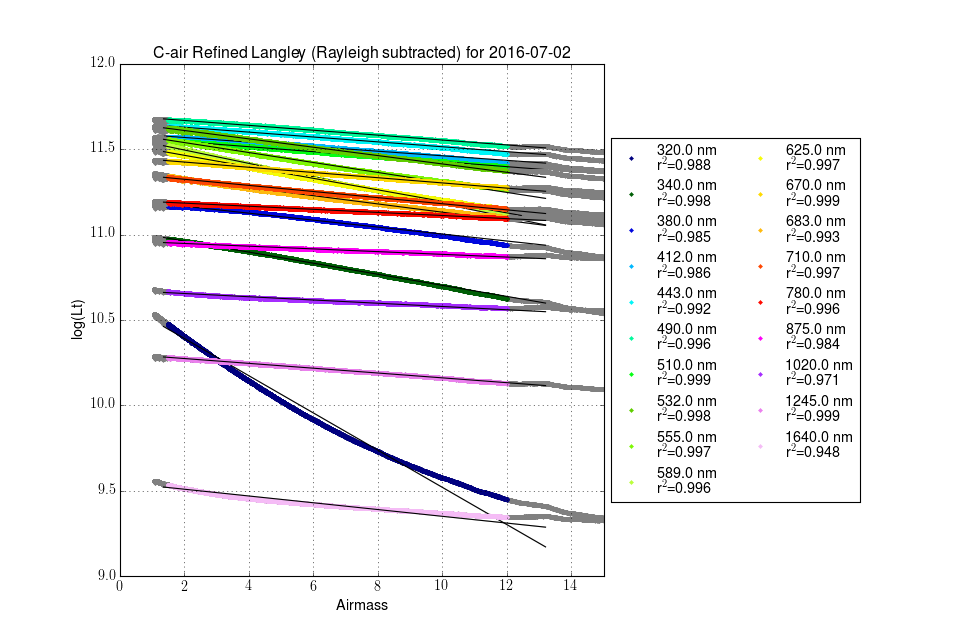

In [36]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
for i,l in enumerate(c['wvl']):
    plt.plot(np.array(c['m_aero'])[fl],np.log(c['Lt_aero'][i,fl]),'.',color='grey')
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero'][i,fl[fl_mu]]))
    plt.plot(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero'][i,fl[fl_mu]]),'.',
             label='{} nm\nr$^2$={:1.3}'.format(l,r[0,1]**2))
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero'][i,fl[fl_mu]]),color='k',ci=0.99,labels=False)
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero'][i,fl[fl_mu]]))
    #ax[i].text(0.1,0.1,'b={}\nR$^2$={}'.format(p[0],r[0,1]**2),transform=ax[i].transAxes)
    #ax[i].set_title('{} nm'.format(l))
plt.grid()
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.0,0.5),loc='center left',ncol=2)
plt.xlim(0,15)
plt.ylim(9,12)
plt.xlabel('Airmass')
plt.ylabel('log(Lt)')

plt.title('C-air Refined Langley (Rayleigh subtracted) for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.savefig(fp+'{:%Y%m%d}_Langley_refined_one.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

### Plot the langleys, but adjusted for bandwidth

<IPython.core.display.Javascript object>


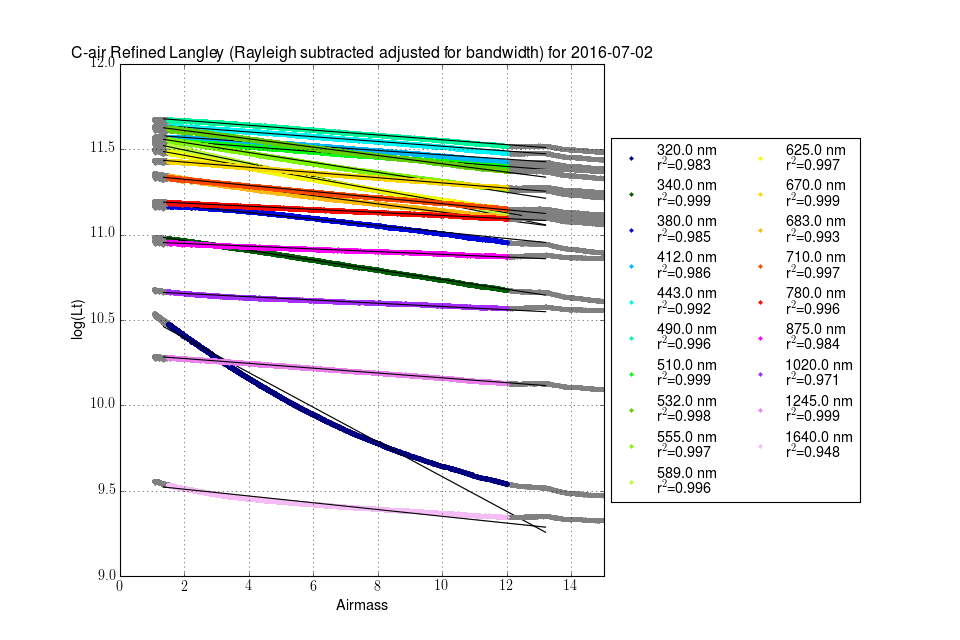

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
for i,l in enumerate(c['wvl']):
    plt.plot(np.array(c['m_aero'])[fl],np.log(c['Lt_aero_fl'][i,fl]),'.',color='grey')
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]]))
    plt.plot(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]]),'.',
             label='{} nm\nr$^2$={:1.3}'.format(l,r[0,1]**2))
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]]),color='k',ci=0.99,labels=False)
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]]))
    #ax[i].text(0.1,0.1,'b={}\nR$^2$={}'.format(p[0],r[0,1]**2),transform=ax[i].transAxes)
    #ax[i].set_title('{} nm'.format(l))
plt.grid()
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.0,0.5),loc='center left',ncol=2)
plt.xlim(0,15)
plt.ylim(9,12)
plt.xlabel('Airmass')
plt.ylabel('log(Lt)')

plt.title('C-air Refined Langley (Rayleigh subtracted adjusted for bandwidth) for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.savefig(fp+'{:%Y%m%d}_Langley_refined_bandwitdht_one.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


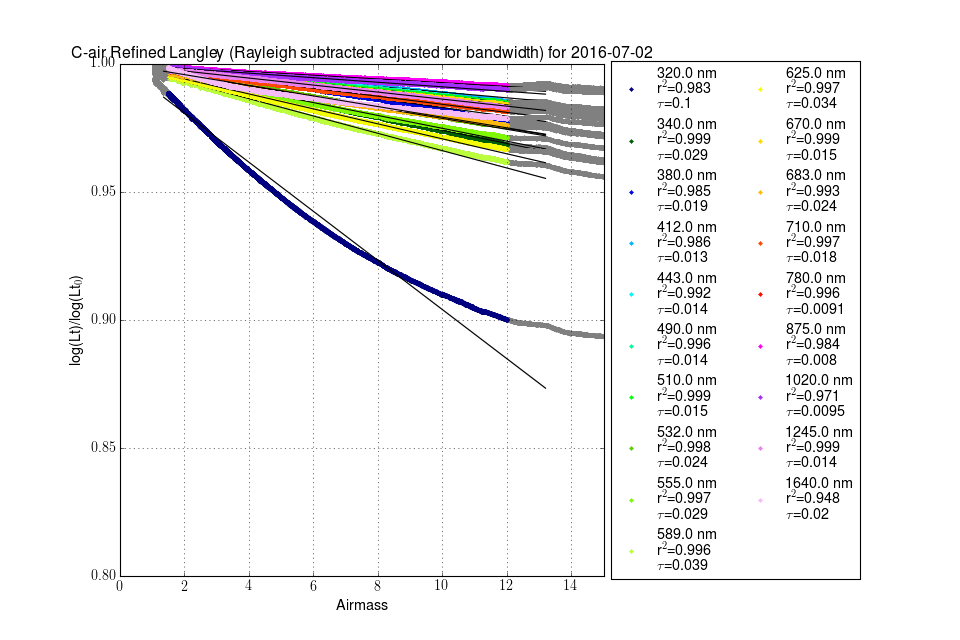

320.0 -0.00959337092581
340.0 -0.00258619120685
380.0 -0.00170043092607
412.0 -0.00110120625545
443.0 -0.00119735682076
490.0 -0.00121330880013
510.0 -0.00125331256875
532.0 -0.00209315085995
555.0 -0.002512890834
589.0 -0.00338502891351
625.0 -0.00292325178121
670.0 -0.00133230504602
683.0 -0.00212586628713
710.0 -0.0015752210134
780.0 -0.000808824190952
875.0 -0.000728007009667
1020.0 -0.000892136753192
1245.0 -0.00137273169275
1640.0 -0.00207826960773


In [59]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
for i,l in enumerate(c['wvl']):
    plt.plot(np.array(c['m_aero'])[fl],np.log(c['Lt_aero_fl'][i,fl])/c['Lt_0'][i],'.',color='grey')
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])/c['Lt_0'][i])
    plt.plot(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])/c['Lt_0'][i],'.',
             label='{} nm\nr$^2$={:1.3}\n$\\tau$={:1.2}'.format(l,r[0,1]**2,c['langley_aod'][i]))
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])/c['Lt_0'][i],
                         color='k',ci=0.99,labels=False)
    print l, p[1]
plt.grid()
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.0,0.5),loc='center left',ncol=2)
plt.xlim(0,15)
plt.ylim(0.8,1)
plt.xlabel('Airmass')
plt.ylabel('log(Lt)/log(Lt$_0$)')

plt.title('C-air Refined Langley (Rayleigh subtracted adjusted for bandwidth) for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.savefig(fp+'{:%Y%m%d}_Langley_refined_bandwitdth_norm_one.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


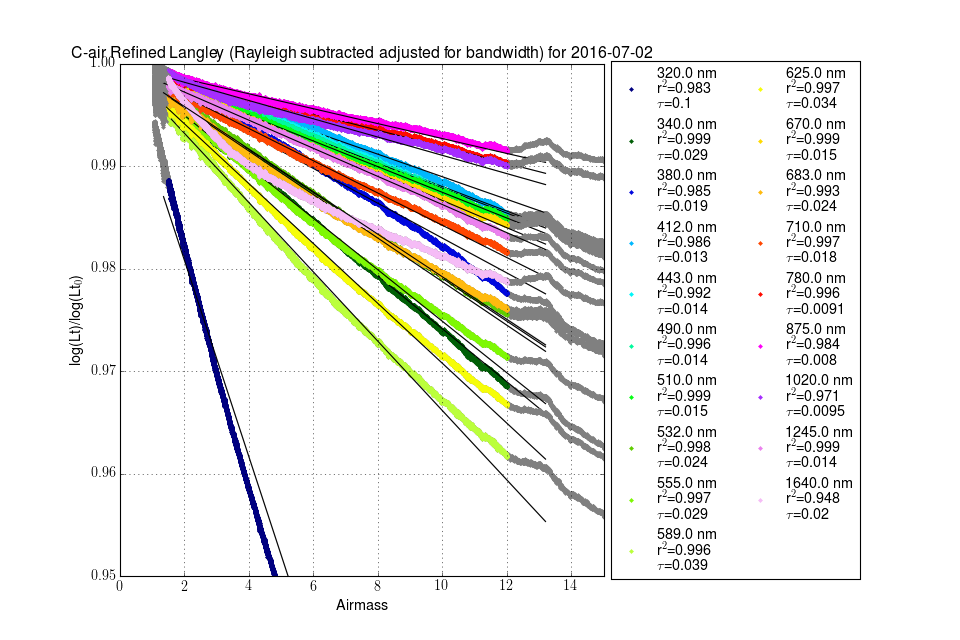

In [56]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
for i,l in enumerate(c['wvl']):
    plt.plot(np.array(c['m_aero'])[fl],np.log(c['Lt_aero_fl'][i,fl])/c['Lt_0'][i],'.',color='grey')
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])/c['Lt_0'][i])
    plt.plot(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])/c['Lt_0'][i],'.',
             label='{} nm\nr$^2$={:1.3}\n$\\tau$={:1.2}'.format(l,r[0,1]**2,c['langley_aod'][i]))
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])/c['Lt_0'][i],
                         color='k',ci=0.99,labels=False)
plt.grid()
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.0,0.5),loc='center left',ncol=2)
plt.xlim(0,15)
plt.ylim(0.95,1)
plt.xlabel('Airmass')
plt.ylabel('log(Lt)/log(Lt$_0$)')

plt.title('C-air Refined Langley (Rayleigh subtracted adjusted for bandwidth) for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.savefig(fp+'{:%Y%m%d}_Langley_refined_bandwitdth_norm_zoom_one.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


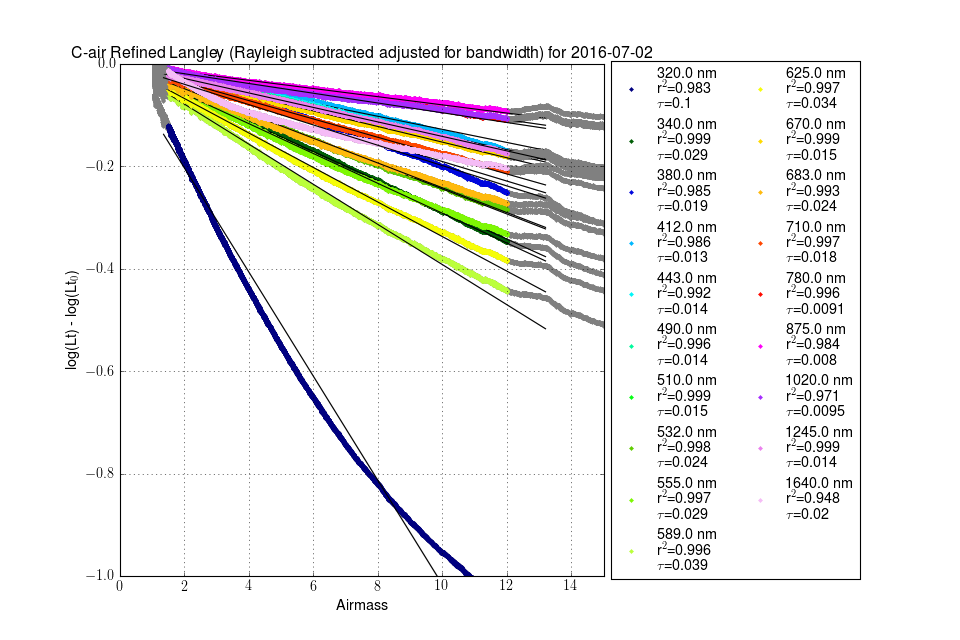

320.0 -0.101673766175
340.0 -0.0285050928967
380.0 -0.0190547908857
412.0 -0.0127691146217
443.0 -0.0139584429465
490.0 -0.0141929807992
510.0 -0.0145055655833
532.0 -0.0244044300882
555.0 -0.0291444027092
589.0 -0.039179431242
625.0 -0.0337120378584
670.0 -0.0152628124956
683.0 -0.0241786694605
710.0 -0.0178949411922
780.0 -0.00906116680262
875.0 -0.00798222516453
1020.0 -0.00952299106361
1245.0 -0.0141425000446
1640.0 -0.0198435337295


In [60]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
for i,l in enumerate(c['wvl']):
    plt.plot(np.array(c['m_aero'])[fl],np.log(c['Lt_aero_fl'][i,fl])-c['Lt_0'][i],'.',color='grey')
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])-c['Lt_0'][i])
    plt.plot(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])-c['Lt_0'][i],'.',
             label='{} nm\nr$^2$={:1.3}\n$\\tau$={:1.2}'.format(l,r[0,1]**2,c['langley_aod'][i]))
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])-c['Lt_0'][i],
                         color='k',ci=0.99,labels=False)
    print l, p[1]
plt.grid()
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.0,0.5),loc='center left',ncol=2)
plt.xlim(0,15)
plt.ylim(-1,0)
plt.xlabel('Airmass')
plt.ylabel('log(Lt) - log(Lt$_0$)')

plt.title('C-air Refined Langley (Rayleigh subtracted adjusted for bandwidth) for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.savefig(fp+'{:%Y%m%d}_Langley_refined_bandwitdth_subtract_zoom_one.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


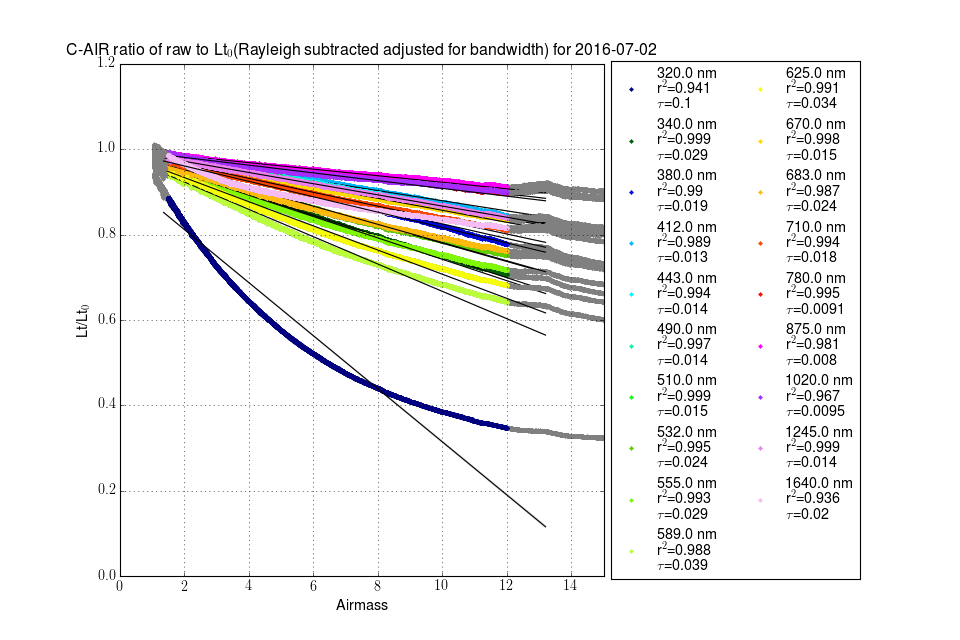

320.0 -0.0621855312719
340.0 -0.0244554379955
380.0 -0.0171032856567
412.0 -0.0118757088729
443.0 -0.0129145438414
490.0 -0.0131252004838
510.0 -0.0134181858349
532.0 -0.0214610887993
555.0 -0.0250475487427
589.0 -0.0320310669371
625.0 -0.0283156213236
670.0 -0.0140727072768
683.0 -0.0213580522798
710.0 -0.016297895133
780.0 -0.00863708896674
875.0 -0.00766315103394
1020.0 -0.00908155547166
1245.0 -0.0131024391747
1640.0 -0.0180439802057


In [61]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
for i,l in enumerate(c['wvl']):
    plt.plot(np.array(c['m_aero'])[fl],c['Lt_aero_fl'][i,fl]/np.exp(c['Lt_0'][i]),'.',color='grey')
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],c['Lt_aero_fl'][i,fl[fl_mu]]/np.exp(c['Lt_0'][i]))
    plt.plot(np.array(c['m_aero'])[fl][fl_mu],c['Lt_aero_fl'][i,fl[fl_mu]]/np.exp(c['Lt_0'][i]),'.',
             label='{} nm\nr$^2$={:1.3}\n$\\tau$={:1.2}'.format(l,r[0,1]**2,c['langley_aod'][i]))
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],c['Lt_aero_fl'][i,fl[fl_mu]]/np.exp(c['Lt_0'][i]),
                         color='k',ci=0.99,labels=False)
    print l,p[1]
plt.grid()
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.0,0.5),loc='center left',ncol=2)
plt.xlim(0,15)
#plt.ylim(-1,0)
plt.xlabel('Airmass')
plt.ylabel('Lt/Lt$_0$')

plt.title('C-AIR ratio of raw to Lt$_0$(Rayleigh subtracted adjusted for bandwidth) for {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))
plt.savefig(fp+'{:%Y%m%d}_Lt_Lt0_one.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

## Plot the AOD spectra

In [73]:
from matplotlib.ticker import FormatStrFormatter

<IPython.core.display.Javascript object>


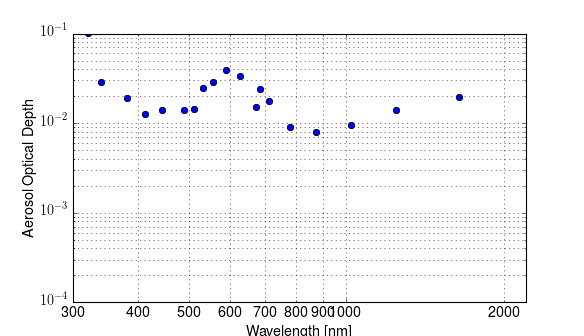

In [76]:
plt.figure()
plt.loglog(c['wvl'],c['langley_aod'],'o')
plt.errorbar(c['wvl'], c['langley_aod'],marker='o',linestyle='None',yerr=c['langley_aod_err'],color='b')
plt.ylim(10**-4,10**-1)
plt.xlim(300,2200)
plt.ylabel('Aerosol Optical Depth')
plt.xlabel('Wavelength [nm]')
plt.grid(which='both')
plt.gca().xaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
plt.savefig(fp+'{:%Y%m%d}_Langley_AOD.png'.format(c['DateTimeUTC'][0]),dpi=600,transparent=True)

## Make a plot with AATS data and C-AIR

In [41]:
fp

'C:\\Users\\sleblan2\\Research\\4STAR\\MLO_2016\\'

<IPython.core.display.Javascript object>


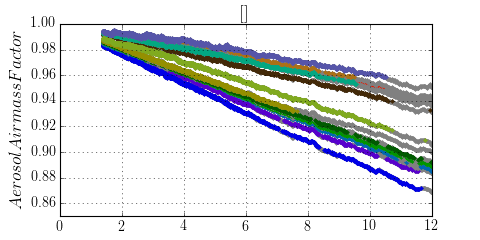

(array([ 11.77897401,  10.71273527,  10.61010783, ...,   1.40061037,
          1.40033578,   1.40006134]),
 array([ 0.90948513,  0.91723159,  0.91795527, ...,  0.98846041,
         0.98861609,  0.98815079]))

In [123]:
pu.plotmatfig(fp+'AATS20160702amstdev_mult3LangleyperV0calc.fig')

In [173]:
reload(pu)

<module 'plotting_utils' from 'plotting_utils.py'>

<IPython.core.display.Javascript object>


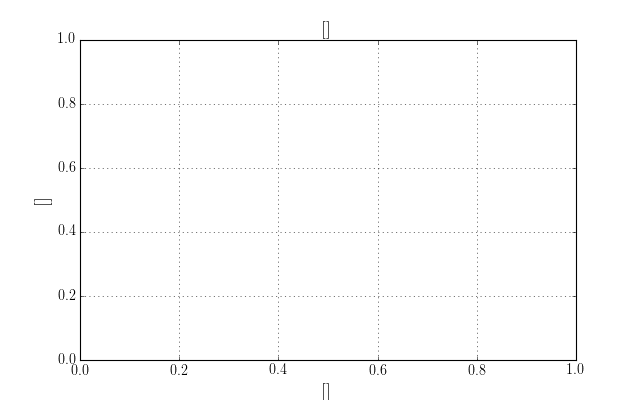

<IPython.core.display.Javascript object>


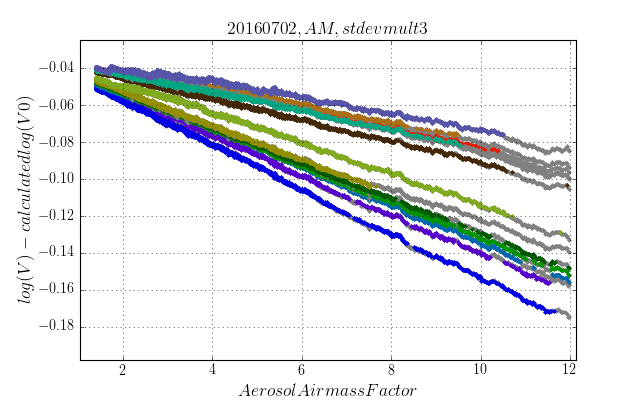

In [174]:
x,y = pu.plotmatfig(fp+'AATS20160702amstdev_mult3LangleyperlogV0calc.fig')

### Extract the AATS data from the plot

In [153]:
len(x)

26

In [154]:
aats = {}
aats['wvl'] = [353.3,380.0,451.2,499.4,520.4,605.8,675.1,779.1,864.5,1019.1,1241.3,1558.5,2139.1]

In [161]:
aats['V'] = np.zeros((len(x)/2,len(y[0])))*np.nan
aats['V_good'] = np.zeros((len(x)/2,len(y[0])))*np.nan
aats['m'] = np.zeros((len(x)/2,len(y[0])))*np.nan
aats['m_good'] = np.zeros((len(x)/2,len(y[0])))*np.nan

In [170]:
for i in range(0,len(x),2):
    aats['m'][i/2,:] = x[i]
    aats['m_good'][i/2,:len(x[i+1])] = x[i+1]
    aats['V'][i/2,:] = y[i]
    aats['V_good'][i/2,:len(y[i+1])] = y[i+1]

### Make the plot of log I - log I0 for cAIR and AATS

<IPython.core.display.Javascript object>


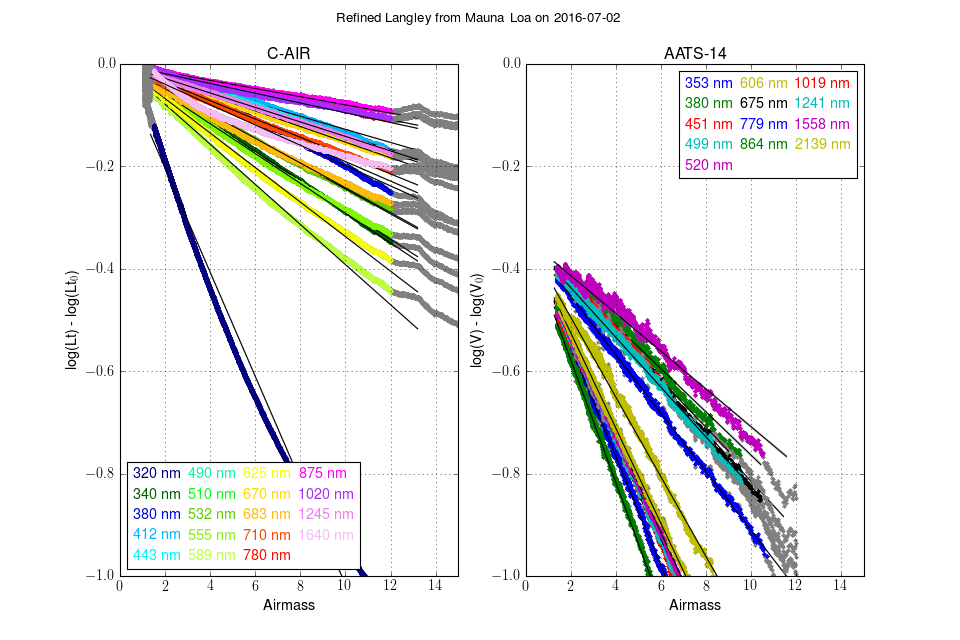

In [202]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(121)
color.cycle_cmap(len(c['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
col = []
for i,l in enumerate(c['wvl']):
    plt.plot(np.array(c['m_aero'])[fl],np.log(c['Lt_aero_fl'][i,fl])-c['Lt_0'][i],'.',color='grey')
    r = np.corrcoef(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])-c['Lt_0'][i])
    pp = plt.plot(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])-c['Lt_0'][i],'.',
             label='{:4.0f} nm'.format(l))
    p,perr = pu.plot_lin(np.array(c['m_aero'])[fl][fl_mu],np.log(c['Lt_aero_fl'][i,fl[fl_mu]])-c['Lt_0'][i],
                         color='k',ci=0.99,labels=False)
    col.append(pp[0].get_color())
    #print l, p[1]
plt.grid()
#box = plt.gca().get_position()
#plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])
#plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.0,0.5),loc='center left',ncol=2)
l = plt.legend(frameon=True,loc='bottom left',ncol=4,markerscale=0,handlelength=0,handletextpad=0,columnspacing=0.5)
for i,text in enumerate(l.get_texts()):
    text.set_color(col[i])
plt.xlim(0,15)
plt.ylim(-1,0)
plt.xlabel('Airmass')
plt.ylabel('log(Lt) - log(Lt$_0$)')
ax.set_title('C-AIR')
plt.suptitle('Refined Langley from Mauna Loa on {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))

ax = fig.add_subplot(122)
color.cycle_cmap(len(aats['wvl'])+1,cmap=plt.cm.gist_ncar,ax=fig.axes[0])
col = []
for i,l in enumerate(aats['wvl']):
    plt.plot(aats['m'][i,:],aats['V'][i,:],'.',color='grey')
    r = np.corrcoef(aats['m_good'][i,:],aats['V_good'][i,:])
    pp = plt.plot(aats['m_good'][i,:],aats['V_good'][i,:],'.',
             label='{:4.0f} nm'.format(l))
    p,perr = pu.plot_lin(aats['m_good'][i,:],aats['V_good'][i,:],
                         color='k',ci=0.99,labels=False)
    col.append(pp[0].get_color())
    #print l, p[1]
plt.grid()
#box = plt.gca().get_position()
#plt.gca().set_position([box.x0, box.y0, box.width * 0.65, box.height])
#plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.0,0.5),loc='center left',ncol=2)
l = plt.legend(frameon=True,loc='bottom left',ncol=3,markerscale=0,handlelength=0,handletextpad=0,columnspacing=0.5)
for i,text in enumerate(l.get_texts()):
    text.set_color(col[i])
plt.xlim(0,15)
plt.ylim(-1,0)
plt.xlabel('Airmass')
plt.ylabel('log(V) - log(V$_0$)')
ax.set_title('AATS-14')

#plt.title('Refined Langley from Mauna Loa on {:%Y-%m-%d}'.format(c['DateTimeUTC'][0]))


plt.savefig(fp+'{:%Y%m%d}_CAIR_AATS_Langley_subtract.png'.format(c['DateTimeUTC'][0]),
            dpi=600,transparent=True)

In [200]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg